In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
import tensorflow as tf
import keras

Using TensorFlow backend.


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Activation, AvgPool2D, MaxPool2D

In [ ]:
import os
import random
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
fid = drive.ListFile({'q':"title='project.zip'"}).GetList()[0]['id']
f = drive.CreateFile({'id': fid})
f.GetContentFile('project.zip')

In [ ]:
f.keys()

dict_keys(['id', 'kind', 'etag', 'selfLink', 'webContentLink', 'alternateLink', 'embedLink', 'iconLink', 'title', 'mimeType', 'labels', 'copyRequiresWriterPermission', 'createdDate', 'modifiedDate', 'lastViewedByMeDate', 'markedViewedByMeDate', 'version', 'parents', 'downloadUrl', 'userPermission', 'originalFilename', 'fileExtension', 'md5Checksum', 'fileSize', 'quotaBytesUsed', 'ownerNames', 'owners', 'lastModifyingUserName', 'lastModifyingUser', 'capabilities', 'editable', 'copyable', 'writersCanShare', 'shared', 'explicitlyTrashed', 'appDataContents', 'headRevisionId', 'spaces'])

In [ ]:
!unzip project.zip

Streaming output truncated to the last 5000 lines.
  inflating: Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train/IM-0447-0001.jpeg  
  inflating: Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train/IM-0448-0001.jpeg  
  inflating: Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train/IM-0449-0001.jpeg  
  inflating: Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train/IM-0450-0001.jpeg  
  inflating: Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train/IM-0451-0001.jpeg  
  inflating: Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train/IM-0452-0001.jpeg  
  inflating: Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train/IM-0453-0001-0002.jpeg  
  inflating: Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train/IM-0453-0001.jpeg  
  inflating: Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train/IM-0455-0001.jpeg  
  inflating: Coronahack-Chest-XRay-Dataset/Coronahack

In [ ]:
PATH = '/content/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset'

In [ ]:
os.listdir(PATH)

['test', 'train']

In [ ]:
train_dir = os.path.join(PATH,'train')
test_dir = os.path.join(PATH,'test')

In [ ]:
img_size = 100

In [ ]:
data = []
for img in os.listdir(train_dir):
  i = img
  try:
    img_array = cv2.imread(os.path.join(train_dir,img),cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array,(img_size, img_size))
    if "virus" in i:
      class_name = 1
      data.append([new_array,class_name])
    elif "bacteria" in i:
      class_name = 2
      data.append([new_array,class_name])
    elif "NORMAL" in i:
      class_name = 0
      data.append([new_array,class_name])  
    else:
      pass
  except Exception as e:
    pass

In [ ]:
data_test = []
for img in os.listdir(test_dir):
  i = img
  try:
    img_array = cv2.imread(os.path.join(test_dir,img),cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array,(img_size, img_size))
    if "virus" in i:
      class_name = 1
      data_test.append([new_array,class_name])
    elif "bacteria" in i:
      class_name = 2
      data_test.append([new_array,class_name])
    elif "NORMAL" in i:
      class_name = 0
      data_test.append([new_array,class_name])  
    else:
      pass
  except Exception as e:
    pass

In [ ]:
len(data)

4619

In [ ]:
len(data_test)

555

In [ ]:
random.shuffle(data)
random.shuffle(data_test)

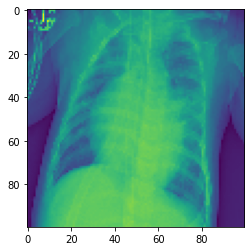

In [ ]:
plt.imshow(data[0][0])
plt.show()

In [ ]:
print(data[0][0].shape, data[0][1])

(100, 100) 2


In [ ]:
x_train=[]
y_train=[]
for i in range(len(data)):
    x_train.append(data[i][0])
    y_train.append(data[i][1])

In [ ]:
x_test=[]
y_test=[]
for i in range(len(data_test)):
    x_test.append(data_test[i][0])
    y_test.append(data_test[i][1])

In [ ]:
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

In [ ]:
y_train

array([2, 2, 2, ..., 2, 2, 2])

In [ ]:
x_train = x_train.reshape(x_train.shape[0], img_size, img_size, 1)
input_shape = (img_size, img_size, 1)

In [ ]:
x_test = x_test.reshape(x_test.shape[0], img_size, img_size, 1)
input_shape = (img_size, img_size, 1)

In [ ]:
x_train[0].shape

(100, 100, 1)

In [ ]:
x_test[0].shape

(100, 100, 1)

In [ ]:
y_train = keras.utils.to_categorical(y_train, 3)
y_test = keras.utils.to_categorical(y_test, 3)

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size = (4, 4), strides = (1, 1),padding='same', activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2), strides=(1,1))) 

model.add(Conv2D(64, kernel_size = (4, 4), strides = (1, 1),padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(1,1)))
model.add(Dropout(0.25))  
    
model.add(Conv2D(64, kernel_size = (4, 4), strides = (1, 1),padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(1,1)))

model.add(Conv2D(64, kernel_size = (4, 4), strides = (1, 1),padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(1,1)))
model.add(Dropout(0.25)) 

model.add(Conv2D(64, kernel_size = (4, 4), strides = (1, 1),padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(1,1)))
    
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(3, activation='softmax'))

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(x_train,y_train,batch_size=110,epochs=15)

Epoch 1/15
4619/4619 [==============================] - 14s 3ms/step - loss: 143.8220 - accuracy: 0.4871
Epoch 2/15
4619/4619 [==============================] - 12s 3ms/step - loss: 0.9284 - accuracy: 0.5683
Epoch 3/15
4619/4619 [==============================] - 12s 3ms/step - loss: 0.8320 - accuracy: 0.6265
Epoch 4/15
4619/4619 [==============================] - 12s 3ms/step - loss: 0.7045 - accuracy: 0.6839
Epoch 5/15
4619/4619 [==============================] - 12s 3ms/step - loss: 0.6107 - accuracy: 0.7311
Epoch 6/15
4619/4619 [==============================] - 12s 3ms/step - loss: 0.5840 - accuracy: 0.7419
Epoch 7/15
4619/4619 [==============================] - 12s 3ms/step - loss: 0.5448 - accuracy: 0.7593
Epoch 8/15
4619/4619 [==============================] - 12s 3ms/step - loss: 0.5151 - accuracy: 0.7759
Epoch 9/15
4619/4619 [==============================] - 12s 3ms/step - loss: 0.4880 - accuracy: 0.7855
Epoch 10/15
4619/4619 [==============================] - 12s 3ms/step -

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.334493721712817
Test accuracy: 0.7099099159240723


In [ ]:
score = model.evaluate(x_train, y_train, verbose=0)
print('Train accuracy:', score[1])

Train accuracy: 0.8594933748245239
